# **Import Libraries**

In [29]:
 # Import Libraries
import numpy as np  # to handle matrix
import pandas as pd # to handle data
from matplotlib import pyplot as plt # to visualize
import datetime, pytz # to handle time
from sklearn.model_selection import train_test_split # Split data
from sklearn.ensemble import RandomForestRegressor # Random Forest Classifier
import yfinance as yf

## **Import The datasets Of yahoo finance**




In [18]:
# Define the ticker symbol for Bitcoin
ticker_symbol = 'BTC-USD'

# Fetch data from Yahoo Finance
btc_data = yf.download(ticker_symbol, start='2021-01-01', end='2024-01-01')

# print(btc_data)

# Display the first few rows
print(btc_data.head())

# Save the data to a CSV file
btc_data.to_csv('bitcoin_data.csv')


[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344   
2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578   
2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
2021-01-04  32810.949219  33440.218750  28722.755859  31971.914062   
2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688   

               Adj Close       Volume  
Date                                   
2021-01-01  29374.152344  40730301359  
2021-01-02  32127.267578  67865420765  
2021-01-03  32782.023438  78665235202  
2021-01-04  31971.914062  81163475344  
2021-01-05  33992.429688  67547324782  


## **Loading and Inspecting the Data**

In [19]:
import pandas as pd

# Load the data
btc_data = pd.read_csv('bitcoin_data.csv', parse_dates=['Date'], index_col='Date')

# Display the first few rows
print(btc_data.head())
print(btc_data.info())


                    Open          High           Low         Close  \
Date                                                                 
2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344   
2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578   
2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
2021-01-04  32810.949219  33440.218750  28722.755859  31971.914062   
2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688   

               Adj Close       Volume  
Date                                   
2021-01-01  29374.152344  40730301359  
2021-01-02  32127.267578  67865420765  
2021-01-03  32782.023438  78665235202  
2021-01-04  31971.914062  81163475344  
2021-01-05  33992.429688  67547324782  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2021-01-01 to 2023-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1095 non-

# **Check Missing Values And Create Additional Features**

In [20]:
# Check for missing values
print(btc_data.isnull().sum())

# Fill missing values if any (forward fill method)
btc_data.fillna(method='ffill', inplace=True)

# Create additional features
btc_data['Open-Close'] = btc_data['Open'] - btc_data['Close']
btc_data['High-Low'] = btc_data['High'] - btc_data['Low']
btc_data['Volume-Change'] = btc_data['Volume'].pct_change()

# Drop rows with NaN values generated by pct_change
btc_data.dropna(inplace=True)

# Display the updated data
print(btc_data.head())


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
                    Open          High           Low         Close  \
Date                                                                 
2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578   
2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
2021-01-04  32810.949219  33440.218750  28722.755859  31971.914062   
2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688   
2021-01-06  34013.613281  36879.699219  33514.035156  36824.363281   

               Adj Close       Volume   Open-Close     High-Low  Volume-Change  
Date                                                                            
2021-01-02  32127.267578  67865420765 -2750.812500  4063.935547       0.666215  
2021-01-03  32782.023438  78665235202  -652.615234  2556.242188       0.159136  
2021-01-04  31971.914062  81163475344   839.035156  4717.462891       0.031758  
2

# **Features And Target**

In [21]:
# Define the features and target
features = ['Open-Close', 'High-Low', 'Volume-Change', 'Close']
target = 'Close'

# Create the input and output datasets
X = btc_data[features]
y = btc_data[target]

# Shift the target to predict the next day's price
y = y.shift(-1)
X = X[:-1]
y = y[:-1]


In [22]:
X


,Open-Close,High-Low,Volume-Change,Close
Date,,,,
2021-01-02,-2750.812500,4063.935547,0.666215,32127.267578
2021-01-03,-652.615234,2556.242188,0.159136,32782.023438
2021-01-04,839.035156,4717.462891,0.031758,31971.914062
2021-01-05,-2015.388672,4216.402344,-0.167762,33992.429688
2021-01-06,-2810.750000,3365.664062,0.114618,36824.363281
...,...,...,...,...
2023-12-26,1079.445312,1926.687500,0.422009,42520.402344
2023-12-27,-924.386719,1515.578125,-0.158722,43442.855469
2023-12-28,840.343750,1486.230469,-0.089816,42627.855469


In [23]:
y

Date
2021-01-02    32782.023438
2021-01-03    31971.914062
2021-01-04    33992.429688
2021-01-05    36824.363281
2021-01-06    39371.042969
                  ...     
2023-12-26    43442.855469
2023-12-27    42627.855469
2023-12-28    42099.402344
2023-12-29    42156.902344
2023-12-30    42265.187500
Name: Close, Length: 1093, dtype: float64

# **Split the data**

In [24]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


# **Train The Model**

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)




# **Make Predictions**

In [32]:
# Predict on the test set
y_pred = rf.predict(X_test)

# Display the first few predictions
print(y_pred[:5])

[26701.68300781 27089.69916016 28030.26783203 27998.37115234
 27830.46429688]


# **Evaluate the Model**

In [26]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 981974.058645725


# **Plot the Variance**

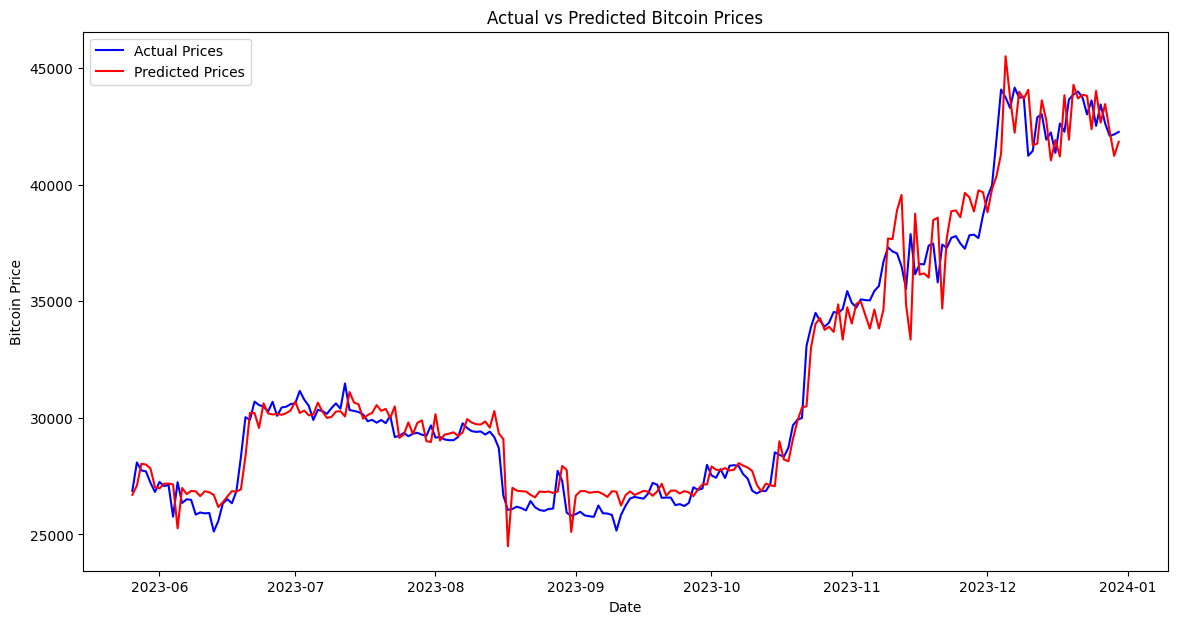

In [33]:
# Plot the actual vs predicted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Prices', color='b')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='r')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.legend()
plt.show()